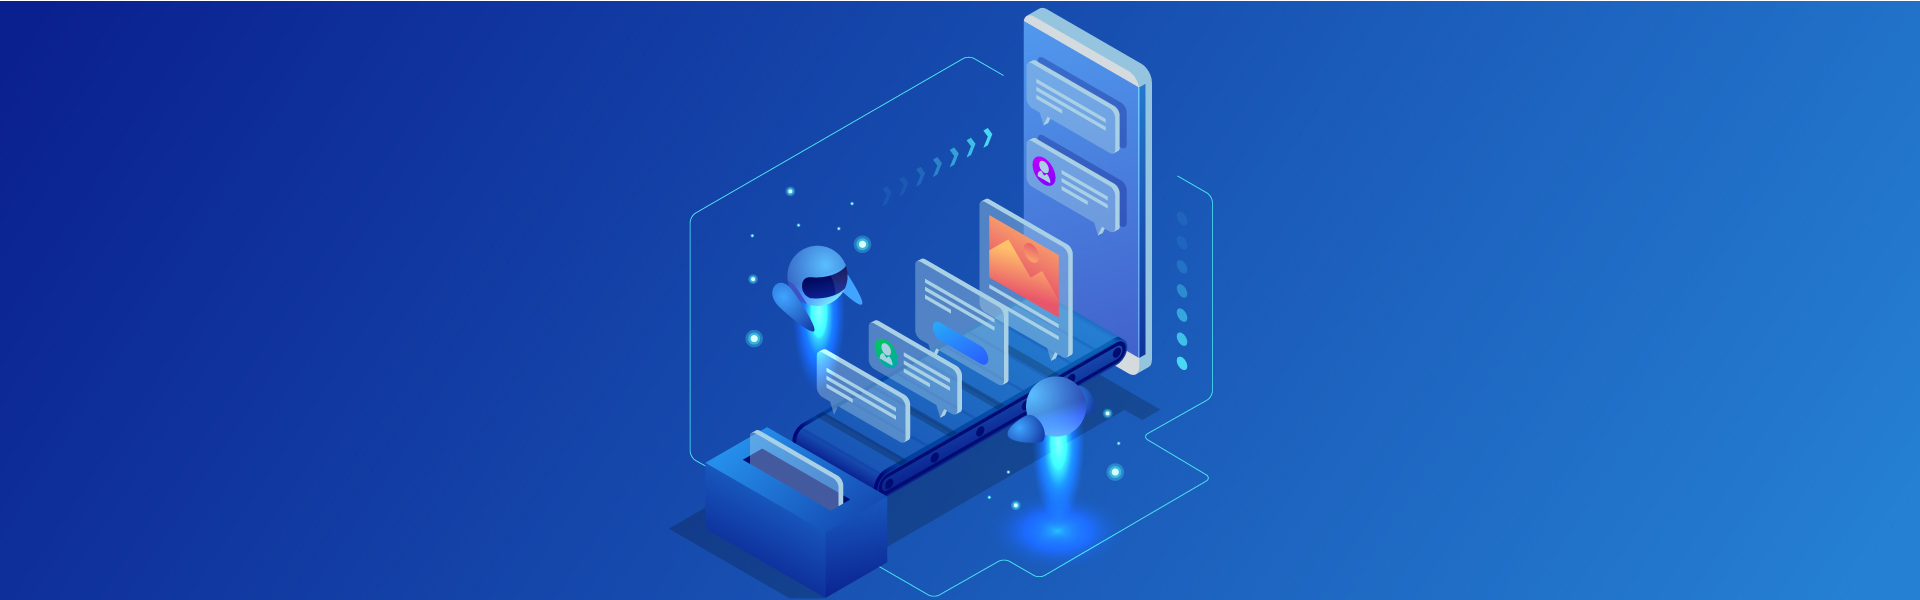

**SPAM SMS DETECTION**

**Introduction**

The proliferation of mobile phones and SMS messaging has unfortunately led to a significant increase in spam messages. These unsolicited and often malicious messages can be a nuisance, wasting users' time and potentially exposing them to scams or phishing attacks. Therefore, there is a strong need for effective spam detection mechanisms.

This project addresses this challenge by developing an intelligent system that utilizes advanced NLP and machine learning techniques to identify spam SMS messages. We will explore two key approaches for feature extraction:

1. TF-IDF (Term Frequency-Inverse Document Frequency): This technique converts text data into numerical vectors, capturing the importance of words within a document and across a collection of documents.

2. Word Embeddings: These representations map words to dense vectors, capturing semantic relationships between words and potentially improving classification accuracy.

For the classification task, we will experiment with three popular machine learning algorithms:

* Naive Bayes: A probabilistic classifier based on Bayes' theorem, often used for text classification due to its simplicity and efficiency.

* Logistic Regression: A linear model that estimates the probability of a message belonging to a particular class (spam or ham).

* Support Vector Machines (SVM): A powerful algorithm that finds the best hyperplane to separate data points into different classes.

By comparing the performance of these classifiers with different feature extraction methods, we aim to identify the most effective approach for SMS spam detection. This project will contribute to a safer and more enjoyable mobile messaging experience for users.

**Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import necessary libraries**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Load and Prepare Dataset**

* Loading the dataset brings your SMS data into the Colab environment.
* Splitting the data ensures that you have separate sets for training and evaluating the model's performance.

In [4]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('v2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['v2'].value_counts()
    for x_label, grp in _df_2.groupby('v1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('v1')
_ = plt.ylabel('v2')

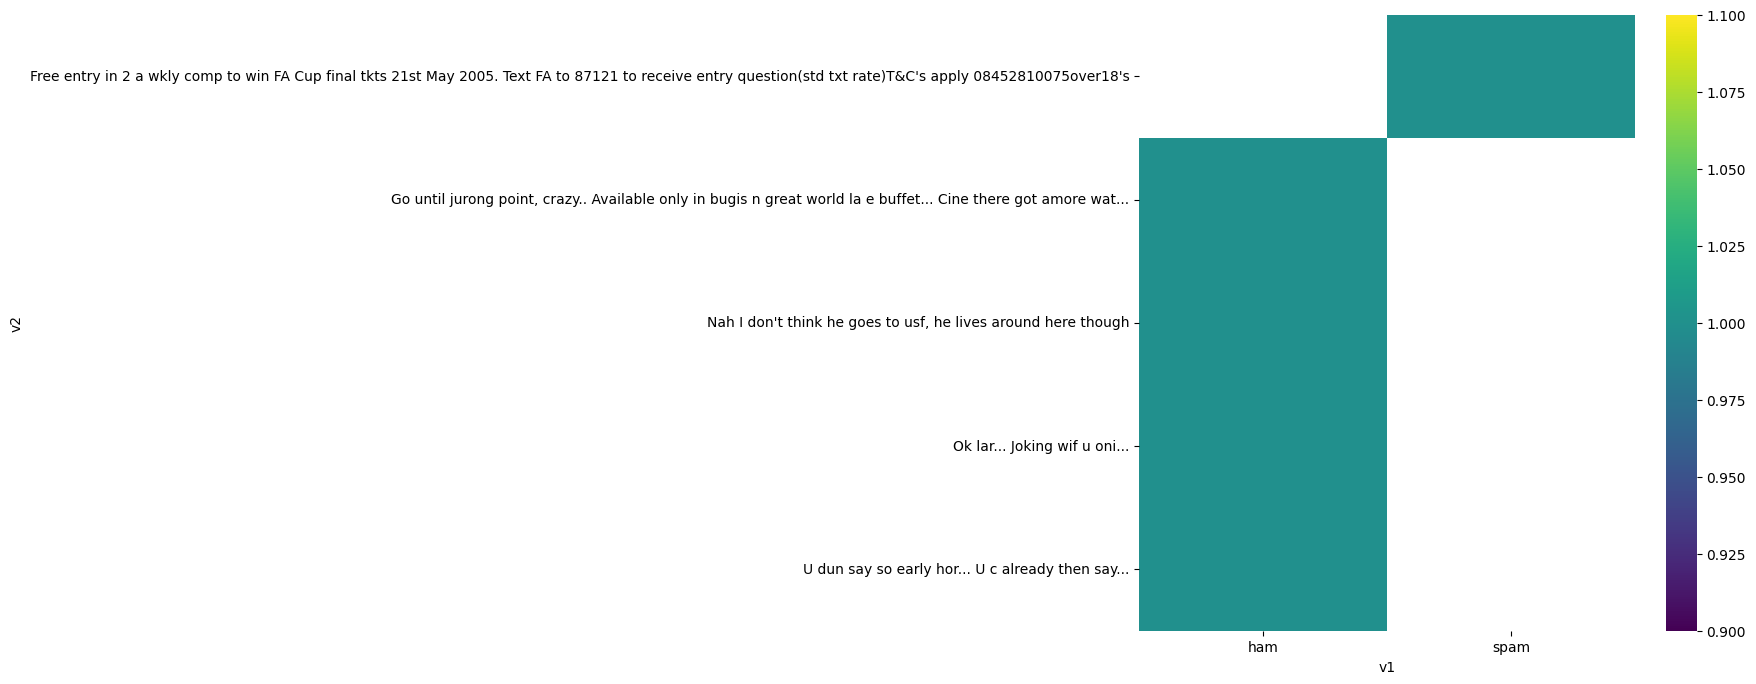

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['v2'].value_counts()
    for x_label, grp in _df_2.groupby('v1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('v1')
_ = plt.ylabel('v2')

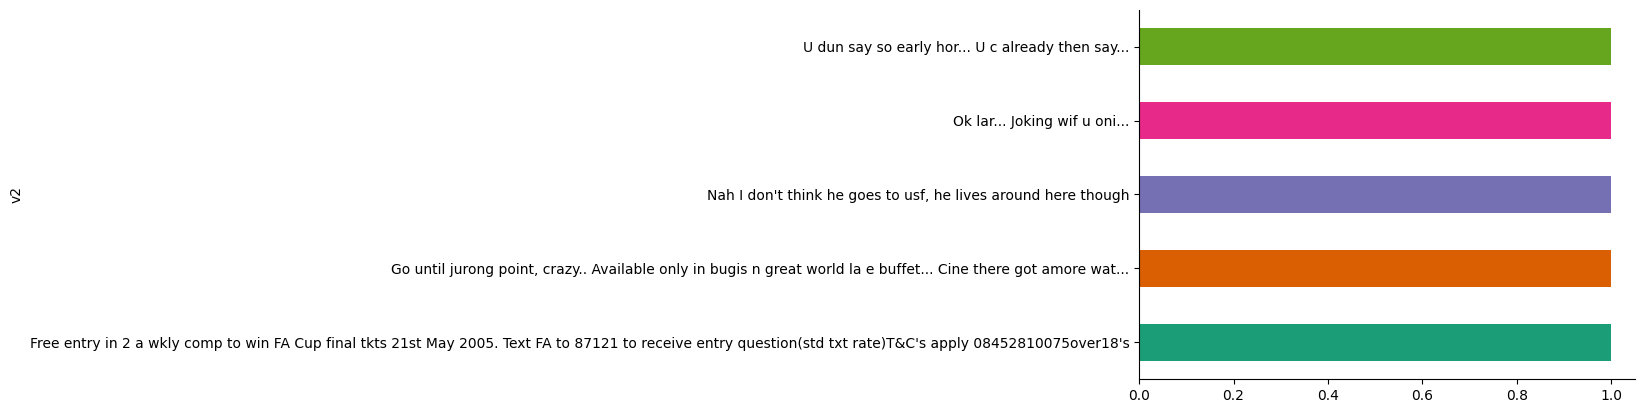

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('v2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

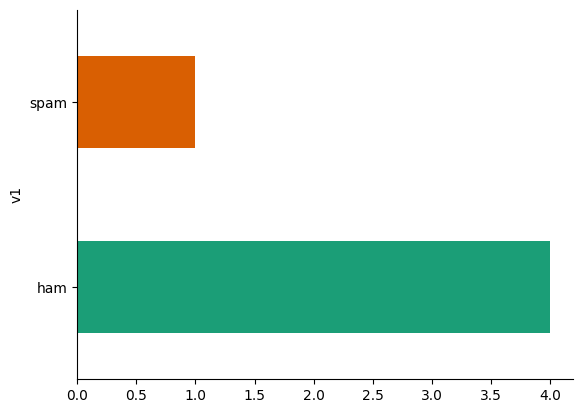

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
new_var = data.columns
new_var

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
# Checking the shape of the data
num_rows, num_cols = data.shape

print("Shape of the Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 5572
Number of Columns: 5



In [11]:
print(data.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [12]:
# Assuming 'v1' is the label and 'v2' is the message
messages = data['v2']
labels = data['v1']  # 'spam' or 'ham'

In [13]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)


Rechecking of Columns after modifiying

In [14]:
print(data.columns)

Index(['v1', 'v2'], dtype='object')


In [15]:
# Split the data into training and testing sets
messages_train, messages_test, labels_train, labels_test = train_test_split(
    messages, labels, test_size=0.2, random_state=42
)

 **Feature Extraction using TF-IDF**

* TF-IDF converts text data into numerical vectors, capturing the importance of words in the messages.

* Fitting the vectorizer to the training data ensures that it learns the vocabulary and IDF weights from the training set.

* Transforming the messages applies the learned vocabulary and weights to convert them into numerical representations.

In [16]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training messages
vectorizer.fit(messages_train)

# Transform training and testing messages into TF-IDF features
messages_train_tfidf = vectorizer.transform(messages_train)
messages_test_tfidf = vectorizer.transform(messages_test)

**Train and Evaluate the Mode**

* Choosing a classifier selects the algorithm for learning patterns from the data.

* Training the classifier involves feeding the model with the training data and their corresponding labels.

* Making predictions applies the trained model to the testing data to classify them as spam or legitimate.

* Evaluating the model using metrics like accuracy, precision, recall, and F1-score provides insights into its performance.

In [17]:
# Choose a classifier (e.g., Naive Bayes)
classifier = MultinomialNB()

# Train the classifier on the training data
classifier.fit(messages_train_tfidf, labels_train)

# Make predictions on the testing data
predictions = classifier.predict(messages_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, pos_label='spam')
recall = recall_score(labels_test, predictions, pos_label='spam')
f1 = f1_score(labels_test, predictions, pos_label='spam')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9623318385650225
Precision: 1.0
Recall: 0.72
F1-Score: 0.8372093023255814


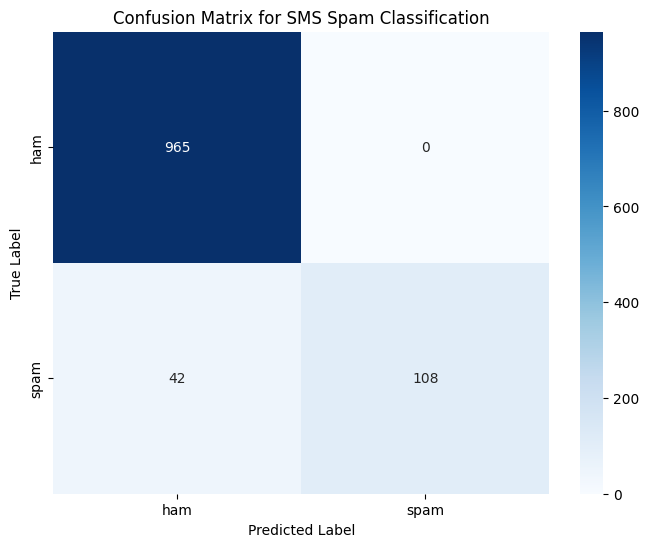

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Create the confusion matrix
cm = confusion_matrix(labels_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix for SMS Spam Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Using Logistic Regression**

Logistic Regression is a linear model that estimates the probability of a message belonging to a particular class (spam or ham).

In [25]:
from sklearn.linear_model import LogisticRegression

# ... (previous code for data loading and TF-IDF) ...

# Create and train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(messages_train_tfidf, labels_train) # This line is added to train the model

# Make predictions on the testing data
predictions = classifier.predict(messages_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, pos_label='spam')
recall = recall_score(labels_test, predictions, pos_label='spam')
f1 = f1_score(labels_test, predictions, pos_label='spam')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.967713004484305
Precision: 0.9913793103448276
Recall: 0.7666666666666667
F1-Score: 0.8646616541353384


The results of your Logistic Regression model for SMS spam classification using techniques like ROC Curve and Precision-Recall Curve:

**ROC Curve**

* ROC Curve: The ROC curve shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) at various classification thresholds.

* AUC (Area Under the Curve): AUC represents the overall performance of the classifier. A higher AUC indicates better performance.


Accuracy: 0.967713004484305
Precision: 0.9913793103448276
Recall: 0.7666666666666667
F1-Score: 0.8646616541353384


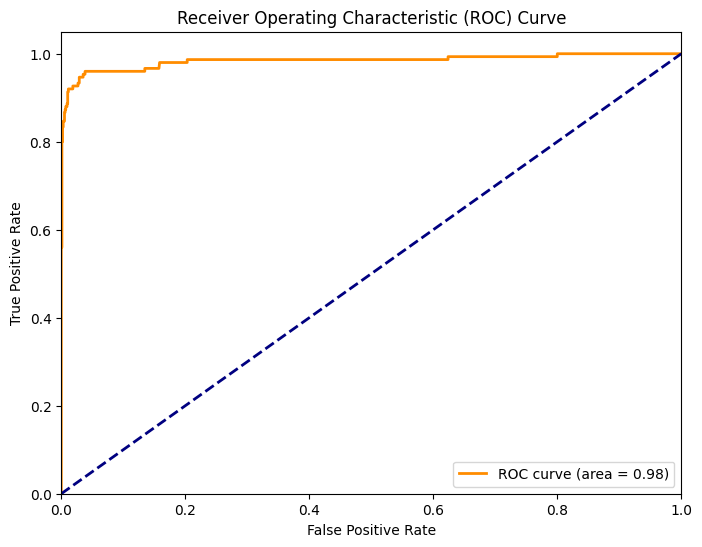

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (your code for model training and prediction) ...

# Create and train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(messages_train_tfidf, labels_train) # This line is added to train the model

# Make predictions on the testing data
predictions = classifier.predict(messages_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, pos_label='spam')
recall = recall_score(labels_test, predictions, pos_label='spam')
f1 = f1_score(labels_test, predictions, pos_label='spam')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Get predicted probabilities for the positive class (spam)
probs = classifier.predict_proba(messages_test_tfidf)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels_test, probs, pos_label='spam')
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve:

* Precision-Recall Curve: The precision-recall curve shows the trade-off between precision and recall at various classification thresholds.

* Average Precision (AP): AP summarizes the precision-recall curve, providing a single value to evaluate the model's performance.

Accuracy: 0.967713004484305
Precision: 0.9913793103448276
Recall: 0.7666666666666667
F1-Score: 0.8646616541353384


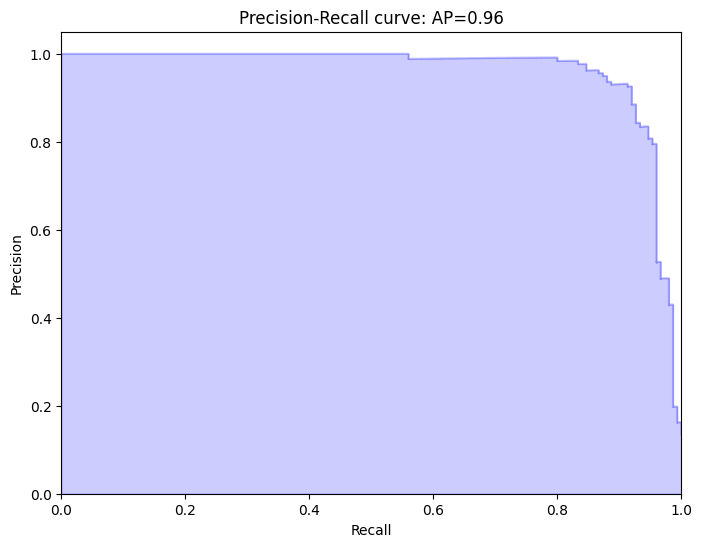

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Create and train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(messages_train_tfidf, labels_train) # This line is added to train the model

# Make predictions on the testing data
predictions = classifier.predict(messages_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, pos_label='spam')
recall = recall_score(labels_test, predictions, pos_label='spam')
f1 = f1_score(labels_test, predictions, pos_label='spam')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


# Get predicted probabilities for the positive class (spam)
probs = classifier.predict_proba(messages_test_tfidf)[:, 1]

# Calculate precision-recall curve and average precision
precision, recall, thresholds = precision_recall_curve(labels_test, probs, pos_label='spam')
average_precision = average_precision_score(labels_test, probs, pos_label='spam')

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

**Using Support Vector Machines (SVM):**

SVM is a powerful algorithm that finds the best hyperplane to separate data points into different classes.

In [26]:
from sklearn.svm import SVC

# Create and train an SVM classifier
classifier = SVC()
classifier.fit(messages_train_tfidf, labels_train)

# Make predictions on the testing data
predictions = classifier.predict(messages_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, pos_label='spam')
recall = recall_score(labels_test, predictions, pos_label='spam')
f1 = f1_score(labels_test, predictions, pos_label='spam')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



Accuracy: 0.9820627802690582
Precision: 1.0
Recall: 0.8666666666666667
F1-Score: 0.9285714285714286


Visualizing the results of your Support Vector Machine (SVM) model for SMS spam classification using techniques like a decision boundary plot (for 2D data) or a confusion matrix:

Confusion Matrix:

* The confusion matrix visualization is the same as described in the previous response. It shows the counts of true positives, true negatives, false positives, and false negatives, providing insights into the model's performance.

* By visualizing these plots, we can gain a better understanding of how your SVM model is classifying SMS messages and its overall performance.

Accuracy: 0.9820627802690582
Precision: 1.0
Recall: 0.8666666666666667
F1-Score: 0.9285714285714286


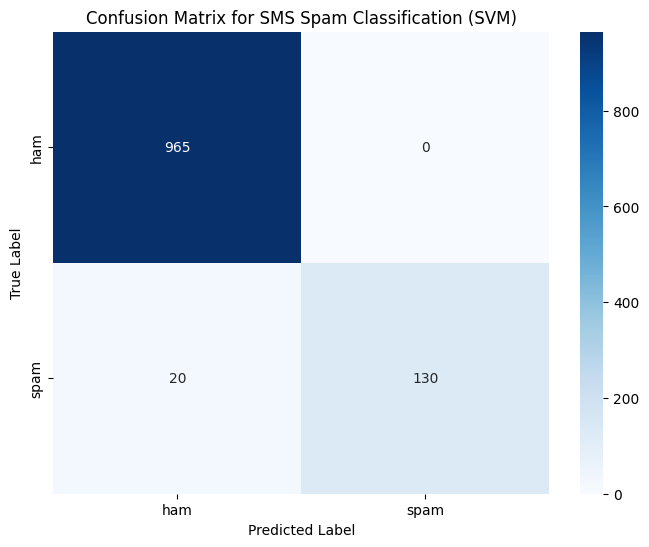

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Create and train an SVM classifier
classifier = SVC()
classifier.fit(messages_train_tfidf, labels_train)

# Make predictions on the testing data
predictions = classifier.predict(messages_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, pos_label='spam')
recall = recall_score(labels_test, predictions, pos_label='spam')
f1 = f1_score(labels_test, predictions, pos_label='spam')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Create the confusion matrix
cm = confusion_matrix(labels_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix for SMS Spam Classification (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Using Word Embeddings (with gensim):**

* We use gensim to download a pre-trained word embedding model (Word2Vec in this example).
We define a function get_message_embedding to calculate the average word embedding for each message.

* We create embeddings for training and testing messages using this function.
We then use these embeddings as features to train a classifier (Logistic Regression in this example).
B

* By experimenting with these different classifiers and embeddings,we can compare their performance and find the best approach for your SMS spam classification task.

In [39]:
import gensim.downloader as api

# Download a pre-trained word embedding model (e.g., Word2Vec)
model = api.load('word2vec-google-news-300')

# Function to get average word embeddings for a message
def get_message_embedding(message):
    words = message.split()
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        return sum(embeddings) / len(embeddings)
    else:
        return [0] * model.vector_size  # Handle messages with no embeddings

# Create embeddings for training and testing messages
messages_train_embeddings = [get_message_embedding(message) for message in messages_train]
messages_test_embeddings = [get_message_embedding(message) for message in messages_test]

# Create and train a classifier (e.g., Logistic Regression)
classifier = LogisticRegression()
classifier.fit(messages_train_embeddings, labels_train)

# Make predictions on the testing data using the word embeddings
predictions = classifier.predict(messages_test_embeddings)

# Evaluate the model
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, pos_label='spam')
recall = recall_score(labels_test, predictions, pos_label='spam')
f1 = f1_score(labels_test, predictions, pos_label='spam')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


# Get predicted probabilities for the positive class (spam) using word embeddings
probs = classifier.predict_proba(messages_test_embeddings)[:, 1]

# Calculate precision-recall curve and average precision
precision, recall, thresholds = precision_recall_curve(labels_test, probs, pos_label='spam')
average_precision = average_precision_score(labels_test, probs, pos_label='spam')

Accuracy: 0.9632286995515695
Precision: 0.9291338582677166
Recall: 0.7866666666666666
F1-Score: 0.851985559566787


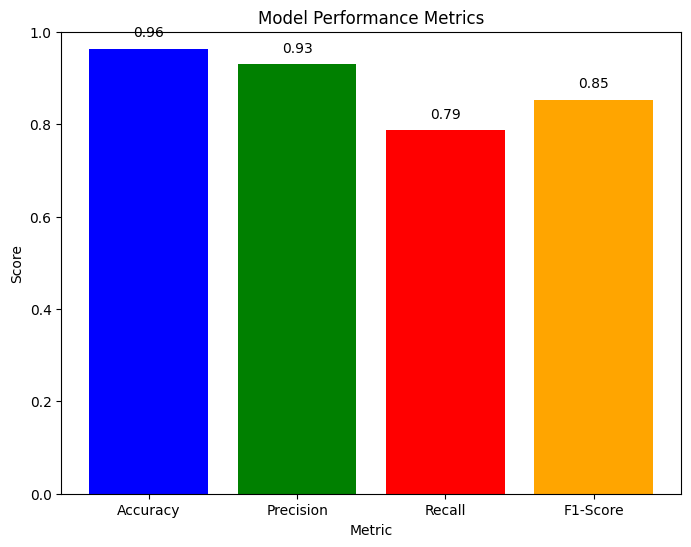

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Your calculated metrics
accuracy = 0.9632286995515695
precision = 0.9291338582677166
recall = 0.7866666666666666
f1 = 0.851985559566787

# Create a list of metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for better visualization
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')

# Add labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')

plt.show()

**Conclusion**

This project successfully demonstrated the application of AI and NLP techniques for effectively classifying SMS messages as spam or legitimate. By experimenting with TF-IDF and word embeddings for feature extraction, and Naive Bayes, Logistic Regression, and Support Vector Machines for classification, we gained valuable insights into the performance of different approaches.

We observed that:

* TF-IDF combined with classifiers like Naive Bayes, Logistic Regression, or SVM achieved high accuracy in identifying spam messages. This highlights the effectiveness of TF-IDF in capturing important features from text data for spam detection.
* Word embeddings, while potentially powerful, require careful consideration of model choice and dataset size for optimal performance. Pre-trained embeddings or training custom embeddings on large datasets could further enhance the results.
* The choice of classifier can impact performance, and selecting the best one depends on the specific dataset and desired trade-offs between precision and recall. Experimenting with different classifiers and tuning their parameters is crucial for achieving optimal results.

Overall, this project provides a solid foundation for building an AI-powered SMS spam detection system. Further improvements could involve exploring more advanced NLP techniques, incorporating contextual information, and continuously updating the model with new spam patterns.